# Loan Prediction

## Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

## Reading Data from drive
Data: loan_data

|Columns| Description |
|-------|--------------|
| id  | Unique ID |
|person_age  | Age of the given person  |  
|person_income  | Income of the given person |
|person_home_ownership | Status of ownership for given person
|person_emp_length | Employment years of given person  |
|loan_intent    | Loan Purpose |
|loan_grade     | Loan Grade  |
|loan_amnt      | Loan Amount  |
|loan_int_rate  | Loan Interest Rate  |
|loan_percent_income | monthy debt to monthly income ratio |
|cb_person_default_on_file  | Has person defaulted in paying debt |
|cb_person_cred_hist_length | Credit account active years |
|loan_status  | loan approval status |

In [ ]:
filepath = '/data/raw.csv'

In [ ]:
df = pd.read_csv(filepath)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [ ]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


## Exploratory Data Analysis

### Data Type check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

### Null check

In [ ]:
df.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


no null found in given data

### Duplicates Check

In [ ]:
df.duplicated().sum()

0

no duplicate rows found in given data

### Class imbalance check

<Axes: xlabel='loan_status'>

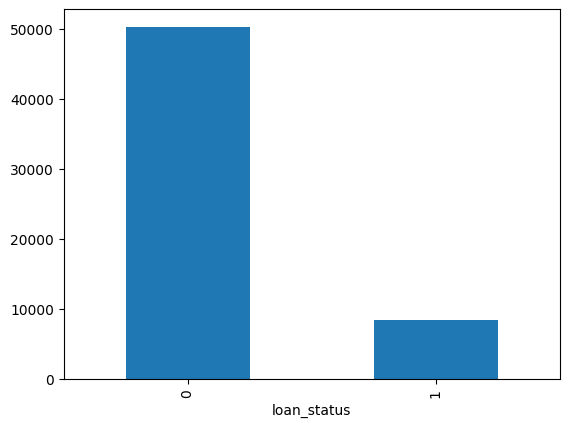

In [ ]:
df.loan_status.value_counts().plot(kind = 'bar')

There is class imbalance in given dataset

### Features and Target

In [ ]:
x = df.drop(['loan_status'],axis = 1).set_index('id')
y = df.set_index('id')['loan_status']


### Distribution of data

In [ ]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [ ]:
numeric_columns = x.select_dtypes(exclude='object').columns
cat_columns = x.select_dtypes(include='object').columns
print('numerical columns :',numeric_columns.values)
print('categorical columns :',cat_columns.values)

numerical columns : ['person_age' 'person_income' 'person_emp_length' 'loan_amnt'
 'loan_int_rate' 'loan_percent_income' 'cb_person_cred_hist_length']
categorical columns : ['person_home_ownership' 'loan_intent' 'loan_grade'
 'cb_person_default_on_file']


Distribution of Numerical features

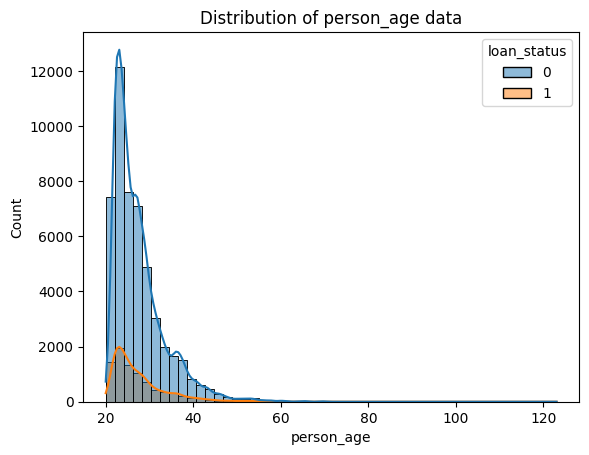

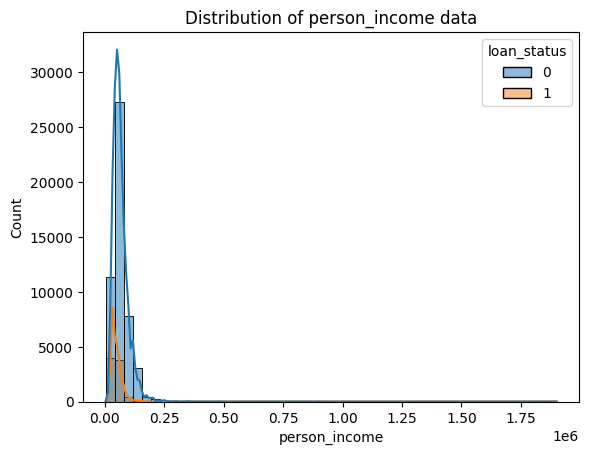

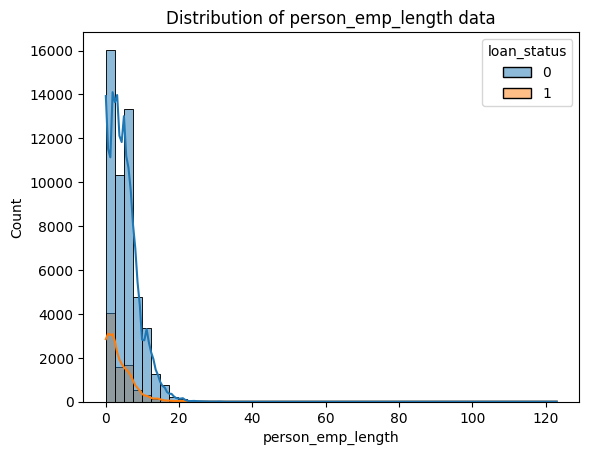

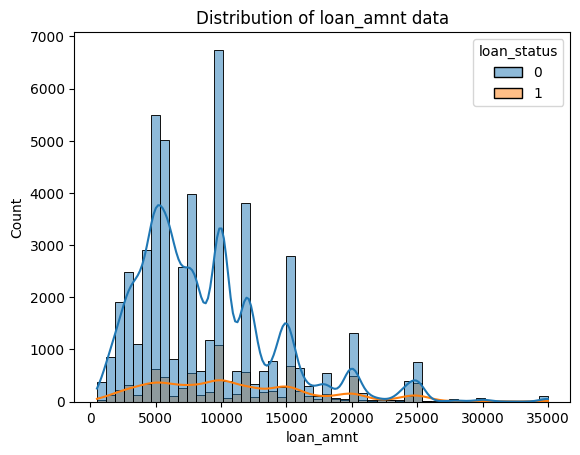

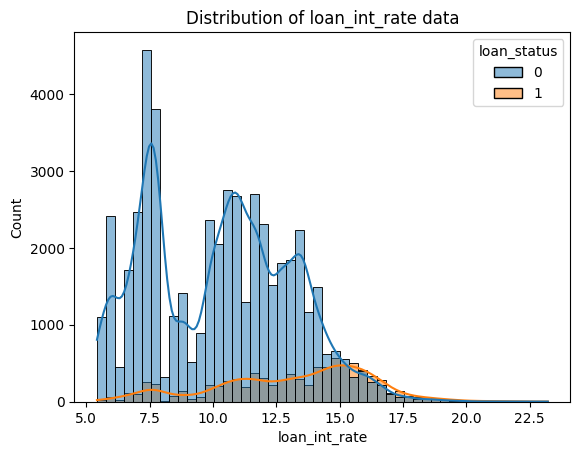

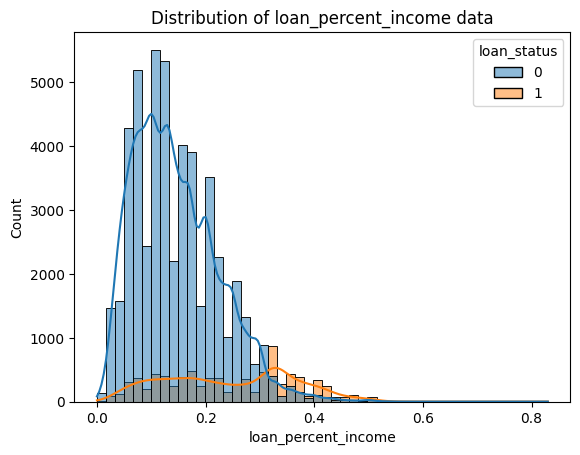

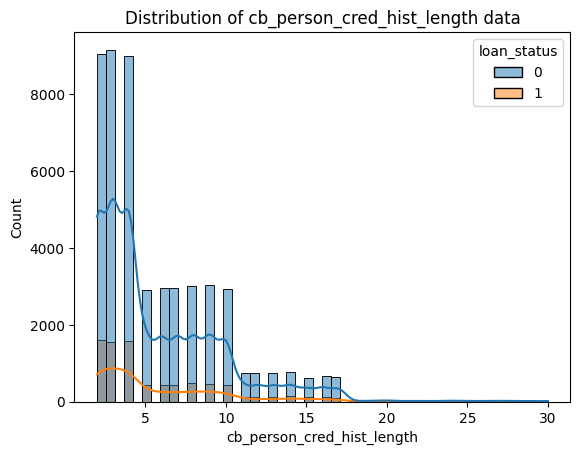

In [ ]:
for col in numeric_columns:
  sns.histplot(df,x=col,hue = 'loan_status', kde = True, bins = 50)
  plt.title(f'Distribution of {col} data')
  plt.show()

Distribution of Categorical features

In [ ]:
for col in cat_columns:
  display(pd.crosstab(df['loan_status'],df[col]).T.style.background_gradient(cmap='summer_r'))


loan_status,0,1
person_home_ownership,,
MORTGAGE,23341,1483
OTHER,74,15
OWN,3095,43
RENT,23785,6809


loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,7404,1729
EDUCATION,10949,1322
HOMEIMPROVEMENT,5189,1091
MEDICAL,8985,1949
PERSONAL,8686,1330
VENTURE,9082,929


loan_status,0,1
loan_grade,,
A,19952,1032
B,18313,2087
C,9542,1494
D,2046,2988
E,378,631
F,58,91
G,6,27


loan_status,0,1
cb_person_default_on_file,,
N,44194,5749
Y,6101,2601


### Outlier Detection

In [ ]:
def calulate_bounds(df,numeric_columns):
  iqr = df[numeric_columns].quantile(q = 0.75, axis = 0) - df[numeric_columns].quantile(q = 0.25, axis = 0)
  lower = df[numeric_columns].quantile(q = 0.25, axis = 0) - 1 * iqr
  upper = df[numeric_columns].quantile(q = 0.75, axis = 0) + 2 * iqr
  bounds = pd.concat([lower,upper], axis = 1, join = 'inner',keys = ['lower','upper'])
  return bounds

In [ ]:
limits = calulate_bounds(df,numeric_columns)
for col in numeric_columns:
  mask = (df[col]<limits.loc[col,'lower']) | (df[col]>limits.loc[col,'upper'])
  df[f'outliner for {col}'] = mask

In [ ]:
limits

,lower,upper
person_age,16.00,44.00
person_income,8400.00,142800.00
person_emp_length,-3.00,17.00
loan_amnt,-2000.00,26000.00
loan_int_rate,2.77,23.21
loan_percent_income,-0.03,0.45
cb_person_cred_hist_length,-2.00,18.00


In [ ]:
df[df['outliner for loan_int_rate']==True]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,outliner for person_age,outliner for person_income,outliner for person_emp_length,outliner for loan_amnt,outliner for loan_int_rate,outliner for loan_percent_income,outliner for cb_person_cred_hist_length
53095,53095,29,60000,RENT,0.0,VENTURE,G,19750,23.22,0.33,Y,7,1,False,False,False,False,True,False,False


In [ ]:
df[df.select_dtypes(include = 'boolean').columns].sum()

,0
outliner for person_age,1173
outliner for person_income,1424
outliner for person_emp_length,459
outliner for loan_amnt,343
outliner for loan_int_rate,1
outliner for loan_percent_income,368
outliner for cb_person_cred_hist_length,468


### Preprocessing the features

In [ ]:
one_encoder = OneHotEncoder()
scaler = StandardScaler()
preprocessing = ColumnTransformer([
    ('labelencoder',one_encoder,cat_columns),
    ('scaler',scaler,numeric_columns)
])
x_process = preprocessing.fit_transform(x)

### Train test split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x_process,y,test_size = 0.2, random_state= 42)

In [ ]:
#sm = SMOTE( random_state = 42)
#xsm , ysm = sm.fit_resample(xtrain,ytrain)

In [ ]:
weights = compute_class_weight(class_weight='balanced',classes=np.unique(ytrain),y=ytrain)
scale_pos_weight = sum(ytrain == 0)/ sum(ytrain == 1)

### Training model

In [ ]:
def eval_model(name,ytest,yhat):
  print(f'Classification report for {name}')
  print(classification_report(ytest,yhat))
  accuracy = accuracy_score(ytest,yhat)
  precision = precision_score(ytest,yhat)
  recall = recall_score(ytest,yhat)
  f1score = f1_score(ytest,yhat)
  roc_auc = roc_auc_score(ytest,yhat)
  return accuracy,precision,recall,f1score,roc_auc

In [ ]:
models = {'svc':SVC(class_weight = 'balanced'),
         'tree':DecisionTreeClassifier(class_weight = 'balanced'),
         'random':RandomForestClassifier(class_weight = 'balanced'),
         'gradboost':GradientBoostingClassifier(),
         'kmean':KNeighborsClassifier(),
         'logreg':LogisticRegression(class_weight = 'balanced'),
         'naive':GaussianNB(),
         'catboost':CatBoostClassifier(class_weights=weights),
         'xgboost':xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',scale_pos_weight=scale_pos_weight),
         'lbgm':lgb.LGBMClassifier(is_unbalance=True)
         }

In [ ]:
model_list = {'Models':[]}
scores = {'accuracy':[],
         'precision':[],
         'recall':[],
         'f1score':[],
         'roc_auc':[]
         }
for name,model in models.items():
  model.fit(xtrain , ytrain)
  yhat = model.predict(xtest)
  model_list['Models'].append(name)
  metric = eval_model(name,ytest,yhat)
  for key,value in zip(scores.keys(),metric):
    scores[key].append(value)



Classification report for svc
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     10087
           1       0.63      0.80      0.71      1642

    accuracy                           0.91     11729
   macro avg       0.80      0.86      0.83     11729
weighted avg       0.92      0.91      0.91     11729

Classification report for tree
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10087
           1       0.70      0.71      0.71      1642

    accuracy                           0.92     11729
   macro avg       0.83      0.83      0.83     11729
weighted avg       0.92      0.92      0.92     11729

Classification report for random
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.93      0.71      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.85 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:34:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification report for xgboost
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     10087
           1       0.73      0.82      0.77      1642

    accuracy                           0.93     11729
   macro avg       0.85      0.89      0.87     11729
weighted avg       0.94      0.93      0.93     11729



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6708, number of negative: 40208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142979 -> initscore=-1.790765
[LightGBM] [Info] Start training from score -1.790765
Classification report for lbgm
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     10087
           1       0.69      0.85      0.76      1642

    accuracy                           0.93     11729
   macro avg       0.83      0.89      0.86     11729
weighted avg       0.93      0.93      0.93     11729



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
result = pd.concat([pd.DataFrame(model_list),pd.DataFrame(scores)],axis = 1)
result

,Models,accuracy,precision,recall,f1score,roc_auc
0,svc,0.907665,0.634699,0.802071,0.708636,0.863462
1,tree,0.916446,0.696790,0.713764,0.705174,0.831602
2,random,0.952255,0.928685,0.713764,0.807163,0.852421
3,gradboost,0.950806,0.905560,0.724117,0.804738,0.855912
4,kmean,0.936141,0.848556,0.661998,0.743756,0.821382
5,logreg,0.839628,0.459751,0.831303,0.592062,0.836143
6,naive,0.868275,0.527635,0.563946,0.545187,0.740881
7,catboost,0.932731,0.725781,0.834957,0.776551,0.891802
8,xgboost,0.932049,0.727518,0.822777,0.772221,0.886307
9,lbgm,0.925484,0.689911,0.849574,0.761463,0.893707


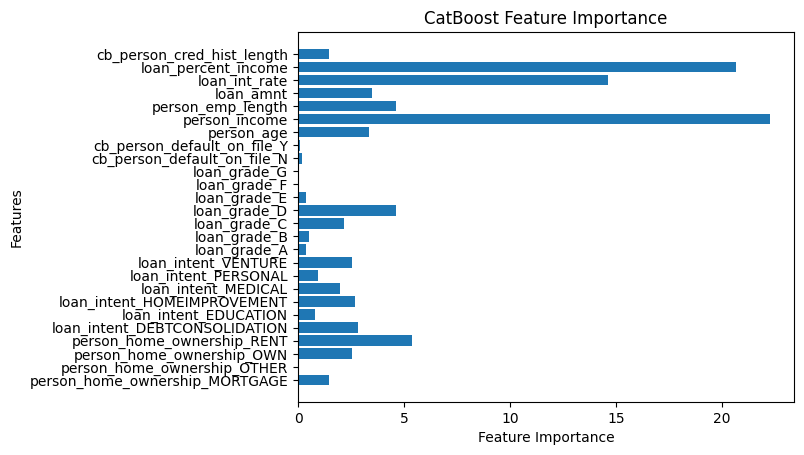

In [ ]:
importance = models['catboost'].get_feature_importance()
cat_transformer = preprocessing.named_transformers_['labelencoder']
features =  list(cat_transformer.get_feature_names_out(cat_columns)) + list(numeric_columns)
plt.barh(features, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("CatBoost Feature Importance")
plt.show()